In [1]:
#Code to download the data files to system

In [1]:
import requests
import re

data_url = "https://escience.rpi.edu/data/DA/fb100/"
response = requests.request("GET",data_url)
html= response.text
# print html
tokens= re.split('>|<',html)
# print tokens
files = [token for token in tokens if token[-3:] == 'mat' and token != 'schools.mat']

for f in files:
    with open(f, 'wb') as handle:
        response = requests.get('https://escience.rpi.edu/data/DA/fb100/' + f, stream=True)
        if not response.ok:
            print('Download of ' + f + ' failed.')
        handle.write(response.content)

In [3]:
from igraph import *

# Q 3(b)

# Ran only for one graph and decided to use igraph because of its time complexity factor.

In [32]:
#network X approach for Average Degree and Average Neighbourhood Degree calcultion

import scipy
import scipy.io
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

# load the .mat file into a dictionary (associative array) d

d = {}
for file_name in files:
    scipy.io.loadmat(file_name, d)
#     print (d)
    for keys,values in d.items():
        if keys == "A":
            print type(values)
#             print values
            print values.shape
            G = nx.from_scipy_sparse_matrix(values)
            print (G.number_of_nodes())
            print (G.number_of_edges())
            giant = max(nx.connected_component_subgraphs(G), key=len)
            print (giant.number_of_nodes())
            print (giant.number_of_edges())
            degrees = giant.degree()
            sum_of_edges = sum(degrees.values())
            avg_deg= float(sum_of_edges)/len(giant)
            print avg_deg
            
            avg_neighbour = nx.average_neighbor_degree(giant)
        
#             print avg_neighbour
            total_avg_neighbour =(sum(avg_neighbour.values())/len(avg_neighbour))
#             nx.draw(giant, node_color='c',edge_color='k', with_labels=True)
#             plt.draw()
#            
            print total_avg_neighbour
    print("------------------")
    break


<class 'scipy.sparse.csc.csc_matrix'>
(6386, 6386)
6386
217662
6370
217654
68.3372056515
111.720381437
------------------


In [7]:
#method to convert scipy compressed sparse matrix to igraph without creating overhead of matrix index of zero elements  , it has better efficiency than inbuilt function igraph.Graph.Adjacency()
def scipy_to_igraph(matrix, directed= False):
    sources, targets = matrix.nonzero()    
    return Graph(zip(sources, targets), directed= directed)

### Used nonzero() method to get only index of non zero elements in scipy. It returns the graph by default with directed edges. So needs to divide by 2 for getting correct number of edges in the graph as our graph is undirected in nature. The below cell takes 1.5 hours to run on all 100 mat files and the result is stored in pickle file for future use.

In [8]:
import igraph.test
# igraph.test.run_tests()
# print igraph.__version__
import scipy
from igraph import *
import pandas as pd
import networkx as nx
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

# load the .mat file into a dictionary (associative array) d

d = {}
FileName=[]
AvgF=[]
AvgFof=[]
for file_name in files:
    scipy.io.loadmat(file_name, d)
    FileName.append(file_name)
    print file_name
    #print (d)
    for keys,values in d.items():
        if keys == "A":
            #print (values)
            shape= values.shape
            G=scipy_to_igraph(values)
            #cluster according to vertex connectedness
            clust = G.clusters()
            #give the biggest component from clustered graphs component
            lcc = clust.giant()
            #As our graph instance is directed by default so we divide by 2 to get correct degree of vertex as undirected graph
            avg_deg= mean(lcc.degree())
            AvgF.append(avg_deg/2)
            #print (" Average number of Friends ",avg_deg/2)
            #Simplify graph from self loop and multiple loops to give to knn which works on undirected and simplified graph 
            X=lcc.simplify()
            #Returns average neighbourhood degree for each vertex
            avg_neighbour = X.knn()
            Avg_Neigh= mean(avg_neighbour[0])
            AvgFof.append(Avg_Neigh)
            #print ("Average number of friends of friends",Avg_Neigh)
    print("------------------")
    

American75.mat
------------------
Amherst41.mat
------------------
Auburn71.mat
------------------
BC17.mat
------------------
BU10.mat
------------------
Baylor93.mat
------------------
Berkeley13.mat
------------------
Bingham82.mat
------------------
Bowdoin47.mat
------------------
Brandeis99.mat
------------------
Brown11.mat
------------------
Bucknell39.mat
------------------
Cal65.mat
------------------
Caltech36.mat
------------------
Carnegie49.mat
------------------
Colgate88.mat
------------------
Columbia2.mat
------------------
Cornell5.mat
------------------
Dartmouth6.mat
------------------
Duke14.mat
------------------
Emory27.mat
------------------
FSU53.mat
------------------
GWU54.mat
------------------
Georgetown15.mat
------------------
Hamilton46.mat
------------------
Harvard1.mat
------------------
Haverford76.mat
------------------
Howard90.mat
------------------
Indiana69.mat
------------------
JMU79.mat
------------------
Johns55.mat
------------------
Lehig

In [10]:
#save the file in pickle format

import pandas as pd
import numpy as numpy
Scatter={"File name":FileName , "Average Friend":AvgF,"Average Frnd of Frnd":AvgFof}
Scatter= pd.DataFrame(Scatter)
print Scatter
Scatter.to_pickle("friends.p")

    Average Friend  Average Frnd of Frnd         File name
0        68.337206            111.720381    American75.mat
1        81.390604            122.304440     Amherst41.mat
2       105.585212            209.658769      Auburn71.mat
3        84.703601            138.584870          BC17.mat
4        64.833621            109.146245          BU10.mat
5       106.229393            177.231925      Baylor93.mat
6        74.447074            149.737701    Berkeley13.mat
7        72.571143            111.709836     Bingham82.mat
8        75.009778            110.870925     Bowdoin47.mat
9        70.780036            139.683670    Brandeis99.mat
10       89.568833            144.307650       Brown11.mat
11       83.087343            117.280402    Bucknell39.mat
12       62.502179             98.220359         Cal65.mat
13       43.703412             74.648801     Caltech36.mat
14       75.504909            130.645374    Carnegie49.mat
15       89.053992            126.949254     Colgate88.m

In [73]:
#open theh pickle file for scatter plot

Scatter1 = pd.read_pickle("friends.p")
print Scatter1

    Average Friend  Average Frnd of Frnd         File name
0        68.337206            111.720381    American75.mat
1        81.390604            122.304440     Amherst41.mat
2       105.585212            209.658769      Auburn71.mat
3        84.703601            138.584870          BC17.mat
4        64.833621            109.146245          BU10.mat
5       106.229393            177.231925      Baylor93.mat
6        74.447074            149.737701    Berkeley13.mat
7        72.571143            111.709836     Bingham82.mat
8        75.009778            110.870925     Bowdoin47.mat
9        70.780036            139.683670    Brandeis99.mat
10       89.568833            144.307650       Brown11.mat
11       83.087343            117.280402    Bucknell39.mat
12       62.502179             98.220359         Cal65.mat
13       43.703412             74.648801     Caltech36.mat
14       75.504909            130.645374    Carnegie49.mat
15       89.053992            126.949254     Colgate88.m

### checking the upward trend line with straight daigonal line
The friendship Paradox hold true for all FB100 Graph as for all Average Friends of Friends > Average Friend as we can validate in scatter plot too.

Graph  points not holding Friendship Paradox  []


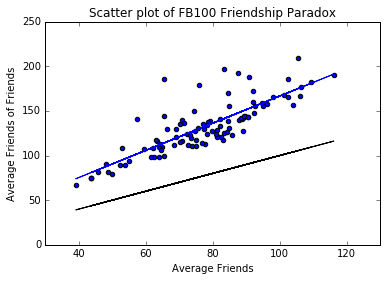

In [88]:
#Scatterplot of Average Friends of Friends vs Average Friends

X= Scatter1["Average Friend"]
Y= Scatter1["Average Frnd of Frnd"]
Scatter1.plot.scatter(x='Average Friend', y='Average Frnd of Frnd')
plt.xlabel('Average Friends')
plt.ylabel('Average Friends of Friends')
plt.title("Scatter plot of FB100 Friendship Paradox")
test =(Scatter1["Average Frnd of Frnd"]/Scatter1["Average Friend"]) 
outliers = ((X[i],Y[i]) for i,t in enumerate(test) if t < 1)

# Graph points not holding Friendship Paradox
print 'Graph  points not holding Friendship Paradox ', list(outliers)
#plot the ab linearfit line on scatter plot of data
m, b = numpy.polyfit(X, Y, 1)
plt.plot(X, m*X + b, '-')

#45 degree line for seeing upward trend in comparison to threshold of friendship paradox
plt.plot(X,X,'k-')

#plot figure
plt.figure();


# Scatter Plot with outliers market with labels

In [77]:
# Defining crieteria for outliers: points having error values more than 2 standard deviation.

def is_outliers(data, m=2):
    return data[abs(data - numpy.mean(data)) > m * numpy.std(data)]
        

('Outliers:', array([16, 63, 77, 91]))
Columbia2.mat
Texas84.mat
UF21.mat
Virginia63.mat


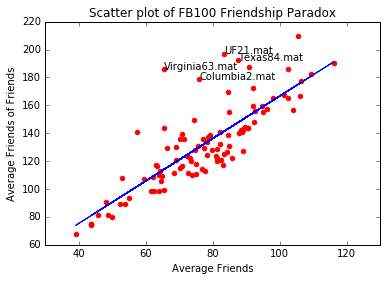

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

X= Scatter1["Average Friend"]
Y= Scatter1["Average Frnd of Frnd"]
Names= Scatter1["File name"]

# Fit a polynomial
(a,b)=scipy.polyfit(X,Y,1)

#Points less than trend line
idx = (X*a + b) < Y

# Scatter plot of all plots with red color
plt.scatter(X,Y, color='r')

#Defining error or distance of point from linear fit line
err = ((X*a+b) - Y) ** 2
# print err

#Get all outliers points
out = is_outliers(err)
# print out
# print type(out)

#Index values of outliers points to get the names
out_index = out.index.values
print ("Outliers:", out_index)

for i in out_index:
    #plot names on scatter plot of outliers
    plt.text(X[i], Y[i], Names[i])
    print (Names[i])

#plot trend line or linear fit line 
plt.plot(X, a*X + b, '-')
plt.xlabel('Average Friends')
plt.ylabel('Average Friends of Friends')
plt.title("Scatter plot of FB100 Friendship Paradox")
#save the plot
plt.savefig('3b.png')

# Q 3(d)

### The below cell calculates the diameter and average path length of Graph and takes 2 hours and 45 mins to finish all 100 graphs. The values are saved in dataframe in pickle format for future use.

In [45]:
import igraph.test
# igraph.test.run_tests()
# print igraph.__version__
import scipy
from igraph import *
import pandas as pd
import networkx as nx
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

e = {}
FileName=[]
Dia=[]
Path=[]

for file_name in files:
    scipy.io.loadmat(file_name, e)
    FileName.append(file_name)
    print file_name
    #print (e)
    for keys,values in e.items():
        if keys == "A":
            #print (values)
            #convert sparse matrix into igraph
            G=scipy_to_igraph(values)
            #print G  
            #clustering according to vertex to get the giant connected component of graph
            clust = G.clusters()
            lcc = clust.giant()
            #print lcc
            #Diameter of graph instance
            dia= lcc.diameter(directed=False)
            Dia.append(dia)
            #print("Diameter:")
            #print dia
            #Give average of all pair shortest path in graph
            path= lcc.average_path_length()
            Path.append(path)
            #print("Average Shortest Path:")
            #print path
    print("------------------")

    

American75.mat
------------------
Amherst41.mat
------------------
Auburn71.mat
------------------
BC17.mat
------------------
BU10.mat
------------------
Baylor93.mat
------------------
Berkeley13.mat
------------------
Bingham82.mat
------------------
Bowdoin47.mat
------------------
Brandeis99.mat
------------------
Brown11.mat
------------------
Bucknell39.mat
------------------
Cal65.mat
------------------
Caltech36.mat
------------------
Carnegie49.mat
------------------
Colgate88.mat
------------------
Columbia2.mat
------------------
Cornell5.mat
------------------
Dartmouth6.mat
------------------
Duke14.mat
------------------
Emory27.mat
------------------
FSU53.mat
------------------
GWU54.mat
------------------
Georgetown15.mat
------------------
Hamilton46.mat
------------------
Harvard1.mat
------------------
Haverford76.mat
------------------
Howard90.mat
------------------
Indiana69.mat
------------------
JMU79.mat
------------------
Johns55.mat
------------------
Lehig

In [58]:
#seperate loop to get size of giant component in graph for fast processing

import igraph.test
# igraph.test.run_tests()
# print igraph.__version__
import scipy
from igraph import *
import pandas as pd
import networkx as nx
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

e = {}
Component=[]
FileName=[]
for file_name in files:
    scipy.io.loadmat(file_name, e)
    FileName.append(file_name)
    print file_name
    #print (e)
    for keys,values in e.items():
        if keys == "A":
            #print (values)
            #convert sparse matrix into igraph instance
            G=scipy_to_igraph(values)
            #print G 
            #get giant component of graph
            clust = G.clusters()
            lcc = clust.giant()
            #print lcc
            #Append the size of component ie vertex count
            Component.append(lcc.vcount())
    print("------------------")


American75.mat
------------------
Amherst41.mat
------------------
Auburn71.mat
------------------
BC17.mat
------------------
BU10.mat
------------------
Baylor93.mat
------------------
Berkeley13.mat
------------------
Bingham82.mat
------------------
Bowdoin47.mat
------------------
Brandeis99.mat
------------------
Brown11.mat
------------------
Bucknell39.mat
------------------
Cal65.mat
------------------
Caltech36.mat
------------------
Carnegie49.mat
------------------
Colgate88.mat
------------------
Columbia2.mat
------------------
Cornell5.mat
------------------
Dartmouth6.mat
------------------
Duke14.mat
------------------
Emory27.mat
------------------
FSU53.mat
------------------
GWU54.mat
------------------
Georgetown15.mat
------------------
Hamilton46.mat
------------------
Harvard1.mat
------------------
Haverford76.mat
------------------
Howard90.mat
------------------
Indiana69.mat
------------------
JMU79.mat
------------------
Johns55.mat
------------------
Lehig

In [62]:
#save the file in pickle format

import pandas as pd
import numpy as numpy
Pathdf={"File name":FileName , "Diameter":Dia,"Average shortest Path":Path, "Component Size":Component}
Pathdf= pd.DataFrame(Pathdf)
print Pathdf
Pathdf.to_pickle("path.p")

    Average shortest Path  Component Size  Diameter         File name
0                2.765969            6370         9    American75.mat
1                2.403661            2235         7     Amherst41.mat
2                2.675470           18448         7      Auburn71.mat
3                2.791837           11498         9          BC17.mat
4                3.027827           19666         9          BU10.mat
5                2.667529           12799         7      Baylor93.mat
6                2.939906           22900         7    Berkeley13.mat
7                2.820404           10001         8     Bingham82.mat
8                2.428715            2250         6     Bowdoin47.mat
9                2.490787            3887         7    Brandeis99.mat
10               2.696156            8586         9       Brown11.mat
11               2.507092            3824         6    Bucknell39.mat
12               2.945359           11243         8         Cal65.mat
13               2.3

In [63]:
#open theh pickle file for scatter plot

Pathdf1 = pd.read_pickle("path.p")
print Pathdf1

    Average shortest Path  Component Size  Diameter         File name
0                2.765969            6370         9    American75.mat
1                2.403661            2235         7     Amherst41.mat
2                2.675470           18448         7      Auburn71.mat
3                2.791837           11498         9          BC17.mat
4                3.027827           19666         9          BU10.mat
5                2.667529           12799         7      Baylor93.mat
6                2.939906           22900         7    Berkeley13.mat
7                2.820404           10001         8     Bingham82.mat
8                2.428715            2250         6     Bowdoin47.mat
9                2.490787            3887         7    Brandeis99.mat
10               2.696156            8586         9       Brown11.mat
11               2.507092            3824         6    Bucknell39.mat
12               2.945359           11243         8         Cal65.mat
13               2.3

# Scatter Plot of diameter vs Component Size 

7.8


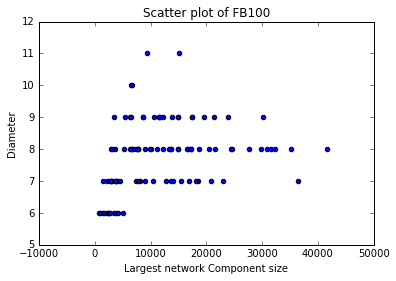

In [93]:
#Scatter plot of diameter vs Component Size 
X= Pathdf1["Component Size"]
Y= Pathdf1["Diameter"]
Pathdf1.plot.scatter(x='Component Size', y='Diameter')
plt.xlabel('Largest network Component size')
plt.ylabel('Diameter')
plt.title("Scatter plot of FB100")
#save the plot
plt.savefig('3d1.png')

#Mean of all Diameters of FB 100
print (mean(Pathdf1["Diameter"]))
# fig, ax = plt.subplots()
# ax.scatter(X, Y)
# for i, txt in enumerate(Pathdf1["File name"]):
#     ax.annotate(txt, (X[i],Y[i]))
    
# fig.title("Scatter plot of FB100")

# Scatter plot of Average Path lenght vs Component Size

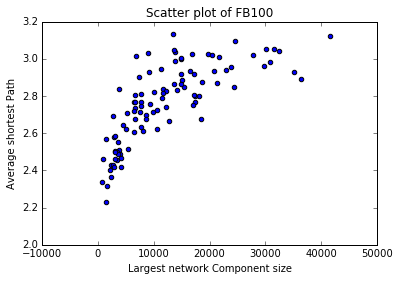

In [94]:
#Scatter plot of Average Path lenght vs Component Size
X= Pathdf1["Component Size"]
Y= Pathdf1["Average shortest Path"]
Pathdf1.plot.scatter(x='Component Size', y='Average shortest Path')
plt.xlabel('Largest network Component size')
plt.ylabel('Average shortest Path')
plt.title("Scatter plot of FB100")
#save the plot
plt.savefig('3d2.png')

### Discuss the degree to which these figures support the six-degrees of separation concept.
